## Algoritmo UCS (Busca de Custo Uniforme)
O **UCS** é um algoritmo de busca informada que expande sempre o nó com menor custo acumulado. É equivalente ao algoritmo de **Dijkstra** para encontrar caminhos mínimos. Características:
- **Completo**: sempre encontra uma solução se ela existir
- **Ótimo**: garante encontrar a solução de menor custo

In [48]:
# Importação das bibliotecas necessárias
import networkx as nx           # Para manipulação de grafos
from heapq import heappop, heappush  # Para fila de prioridade
import time                     # Para medição de tempo
import matplotlib.pyplot as plt # Para visualização
import os                       # Para manipulação de diretórios

In [49]:
# Carregamento do grafo
grafo = nx.read_graphml("grafo_ponte_tocha.graphml")

In [50]:
def busca_custo_uniforme(grafo, no_inicial):
    """
    Implementação do algoritmo UCS (Uniform Cost Search) baseado em Dijkstra.
    
    Args:
        grafo (nx.Graph): Grafo ponderado a ser explorado
        no_inicial (str): Nó de início da busca
    
    Returns:
        tuple: (distancias, predecessores, arestas_exploradas) onde:
            - distancias: dict com a distância mínima para cada nó
            - predecessores: dict com o predecessor de cada nó no caminho ótimo
            - arestas_exploradas: lista de arestas exploradas durante a busca
    """
    # Inicializa distâncias como infinito para todos os nós
    distancias = {vertice: float('inf') for vertice in grafo.nodes()}
    predecessores = {vertice: None for vertice in grafo.nodes()}
    distancias[no_inicial] = 0
    nos_visitados = set()  # Set para rastrear nós visitados
    arestas_exploradas = []  # Lista para rastrear arestas exploradas (para visualização)

    # Fila de prioridade: (distancia, no)
    fila_prioridade = []
    for vertice in grafo.nodes():
        heappush(fila_prioridade, (distancias[vertice], vertice))

    while fila_prioridade:
        distancia_atual, no_atual = heappop(fila_prioridade)

        # Se já foi visitado, ignora (pode ter versão melhor na fila)
        if no_atual in nos_visitados:
            continue

        # Marca como visitado
        nos_visitados.add(no_atual)

        # Explora todos os vizinhos do nó atual
        for vizinho in grafo.neighbors(no_atual):
            # Registra a aresta explorada para visualização
            arestas_exploradas.append((no_atual, vizinho))
            
            peso_aresta = grafo[no_atual][vizinho]['weight']
            nova_distancia = distancias[no_atual] + peso_aresta

            # Se encontrou um caminho melhor para o vizinho
            if nova_distancia < distancias[vizinho]:
                distancias[vizinho] = nova_distancia
                predecessores[vizinho] = no_atual
                heappush(fila_prioridade, (nova_distancia, vizinho))

    return distancias, predecessores, arestas_exploradas

In [51]:
def reconstruir_caminho(predecessores, no_inicial, no_final):
    """
    Reconstrói o caminho ótimo a partir dos predecessores.
    
    Args:
        predecessores (dict): Dicionário de predecessores obtido do UCS
        no_inicial (str): Nó inicial do caminho
        no_final (str): Nó final do caminho
    
    Returns:
        list: Sequência de nós que forma o caminho ótimo, ou lista vazia se não houver caminho
    """
    caminho = []
    no_atual = no_final
    
    # Reconstrói o caminho seguindo os predecessores
    while no_atual is not None:
        caminho.append(no_atual)
        no_atual = predecessores[no_atual]
    
    # Inverte o caminho para ter a ordem correta (início -> fim)
    caminho.reverse()
    
    # Verifica se o caminho é válido (começa no nó inicial)
    return caminho if caminho and caminho[0] == no_inicial else []

In [52]:
# Execução do algoritmo UCS
tempo_inicio = time.time()

# Estados inicial e objetivo
estado_inicial = "inicio=ABCD|tocha=inicio"
estado_objetivo = "inicio=VAZIO|tocha=final"

# Executa o algoritmo UCS
distancias, predecessores, arestas_exploradas = busca_custo_uniforme(grafo, estado_inicial)

# Reconstrói o caminho ótimo
caminho_otimo = reconstruir_caminho(predecessores, estado_inicial, estado_objetivo)

tempo_fim = time.time()
duracao = tempo_fim - tempo_inicio

# Exibe os resultados
print("=== Resultados da Busca UCS ===")
print(f"Caminho ótimo encontrado: {caminho_otimo}")
print(f"Custo total: {distancias[estado_objetivo]}")
print(f"Número de passos: {len(caminho_otimo) - 1}")
print(f"Número de arestas exploradas: {len(arestas_exploradas)}")
print(f"Tempo de execução: {duracao:.6f} segundos")

# Análise do caminho encontrado
if caminho_otimo:
    print(f"\n=== Análise do Caminho ===")
    for i, estado in enumerate(caminho_otimo):
        if i < len(caminho_otimo) - 1:
            proximo_estado = caminho_otimo[i + 1]
            custo_passo = grafo[estado][proximo_estado]['weight']
            print(f"Passo {i}: {estado} -> custo: {custo_passo}")
        else:
            print(f"Passo {i}: {estado} (OBJETIVO ALCANÇADO)")

=== Resultados da Busca UCS ===
Caminho ótimo encontrado: ['inicio=ABCD|tocha=inicio', 'inicio=CD|tocha=final', 'inicio=ACD|tocha=inicio', 'inicio=A|tocha=final', 'inicio=AB|tocha=inicio', 'inicio=VAZIO|tocha=final']
Custo total: 17
Número de passos: 5
Número de arestas exploradas: 48
Tempo de execução: 0.000229 segundos

=== Análise do Caminho ===
Passo 0: inicio=ABCD|tocha=inicio -> custo: 2
Passo 1: inicio=CD|tocha=final -> custo: 1
Passo 2: inicio=ACD|tocha=inicio -> custo: 10
Passo 3: inicio=A|tocha=final -> custo: 2
Passo 4: inicio=AB|tocha=inicio -> custo: 2
Passo 5: inicio=VAZIO|tocha=final (OBJETIVO ALCANÇADO)


Imagem da exploração UCS salva em: imagens/ucs_exploracao.png


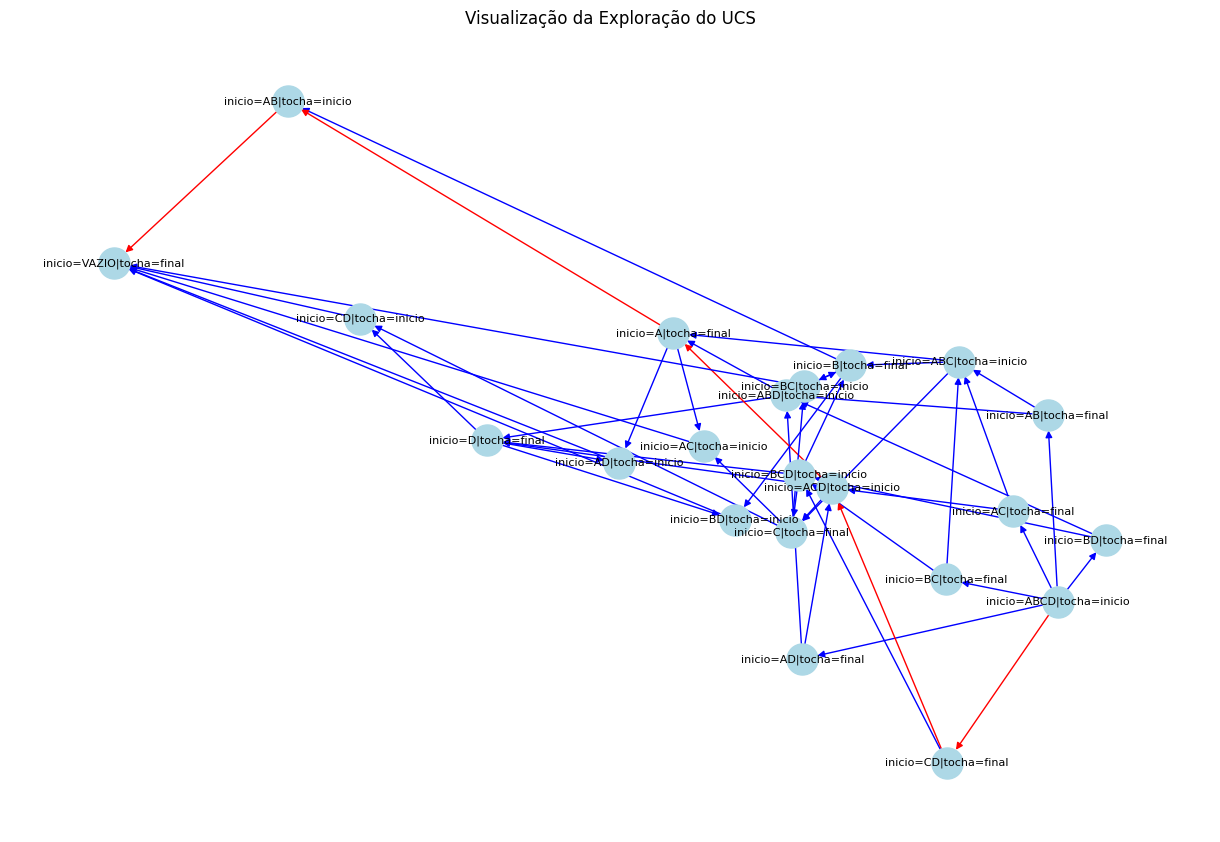

In [53]:
def visualizar_exploracao_ucs(grafo, arestas_exploradas, caminho_final, salvar_imagem=True):
    """
    Visualiza o grafo destacando as arestas exploradas e o caminho final encontrado pelo UCS.
    
    Args:
        grafo (nx.Graph): Grafo a ser visualizado
        arestas_exploradas (list): Lista de arestas exploradas durante a busca
        caminho_final (list): Sequência de nós do caminho ótimo encontrado
        salvar_imagem (bool): Se True, salva a imagem em arquivo
    """
    cores_arestas = []
    arestas_caminho = set(zip(caminho_final, caminho_final[1:])) if caminho_final else set()

    # Define cores das arestas baseado no tipo
    for origem, destino in grafo.edges():
        if (origem, destino) in arestas_caminho:
            cores_arestas.append("red")      # Caminho final em vermelho
        elif (origem, destino) in arestas_exploradas or (destino, origem) in arestas_exploradas:
            cores_arestas.append("blue")     # Arestas exploradas em cinza
        else:
            cores_arestas.append("gray") # Outras arestas em cinza claro

    # Cria o layout e desenha o grafo
    posicoes = nx.spring_layout(grafo, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(
        grafo, 
        posicoes, 
        with_labels=True, 
        node_size=500,
        node_color="lightblue", 
        edge_color=cores_arestas, 
        arrows=True,
        font_size=8
    )
    
    plt.title("Visualização da Exploração do UCS")
    
    # Salva a imagem se solicitado
    if salvar_imagem:
        if not os.path.exists('imagens'):
            os.makedirs('imagens')
        plt.savefig('imagens/ucs_exploracao.png', dpi=300, bbox_inches='tight')
        print("Imagem da exploração UCS salva em: imagens/ucs_exploracao.png")
    
    plt.show()

# Visualiza o resultado
if caminho_otimo:
    visualizar_exploracao_ucs(grafo, arestas_exploradas, caminho_otimo, salvar_imagem=True)